# Scipyで２次計画問題を解く〜ポートフォリオ最適化の例〜

Scipyのオプティマイザーのmethod='SLSQP'で２次計画問題を解くことができます．

ポートフォリオ最適化を例にして

## 準備

はじめに今回用いるライブラリをインポートしておきます．

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

今回の例では，Kenneth R. French教授のData Libraryの30業種ポートフォリオを用います．

http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [2]:
name = '30_Industry_Portfolios'
df_dict = pdr.DataReader(name=name, data_source='famafrench')
df = df_dict[0]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.92,-3.70,-3.15,1.12,1.23,0.85,-3.11,0.00,-4.04,-8.66,...,-6.84,-7.10,-7.88,-5.49,-4.04,-2.55,-1.92,-0.98,-1.18,2.24
2010-02,2.92,0.25,5.00,6.02,-1.78,3.69,6.07,0.37,5.46,15.68,...,2.92,2.84,6.30,3.05,7.25,5.89,4.32,4.50,2.71,1.87
2010-03,4.44,6.11,6.36,12.06,5.53,2.13,11.39,3.61,7.34,8.42,...,7.88,5.22,8.13,5.86,8.11,5.99,6.14,8.27,8.14,9.07
2010-04,-1.46,-1.76,-3.03,10.96,2.32,1.21,4.23,-2.22,3.08,11.43,...,3.82,0.46,3.89,4.21,3.82,3.20,1.85,7.31,0.95,3.86
2010-05,-5.37,-3.88,-7.71,-7.05,-10.12,-4.35,-5.67,-8.01,-9.99,-9.87,...,-5.91,-8.31,-7.07,-8.89,-5.98,-4.01,-5.83,-4.76,-9.12,-10.05
2010-06,-1.97,-1.63,3.54,-8.80,-8.70,-3.24,-9.31,-1.63,-7.79,-14.55,...,-4.33,-6.78,-5.99,-2.30,-7.66,-5.20,-10.56,-5.21,-7.31,-7.58
2010-07,5.04,8.37,11.12,7.85,5.29,4.22,8.34,2.15,14.24,6.81,...,9.74,8.23,6.82,7.64,10.84,3.20,4.65,6.90,6.62,8.03
2010-08,-0.46,-0.01,-0.05,-1.32,-10.04,-3.96,-7.41,-1.66,-0.11,-5.50,...,-2.23,-5.26,-8.21,-6.06,-4.65,-7.55,-4.18,0.46,-8.38,-7.12
2010-09,1.57,4.95,10.04,14.16,12.91,3.98,17.54,9.00,9.96,13.39,...,7.87,11.62,13.48,9.16,9.87,9.90,13.59,7.06,7.46,10.01


平均は１次元の形式（pandas.Seriesや１次元のnumpy.array）にしておきます．

In [9]:
mean = df.mean()
cov = df.cov()
std = np.sqrt(np.diag(cov))

各資産を標準偏差と期待リターンでプロットし，シャープレシオ(リスクフリーレートは考慮しない)で色付けします．

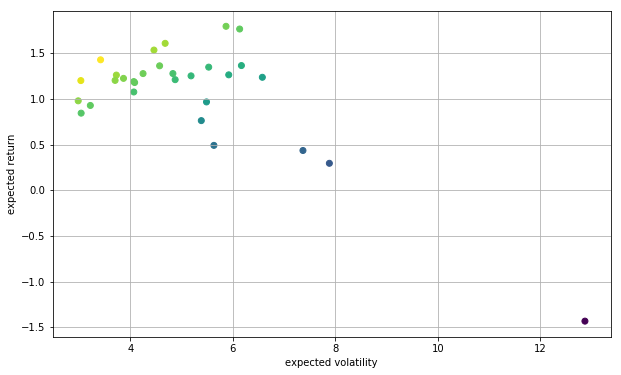

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(std, mean, c=mean/std, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')

これらの資産への最適な投資比率を決定するのが目的です．

# SciPy Optimization で二次計画問題を解く

### scipy.optimize.minimize() を用いる

|引数|内容|型|
|:--|:--|:--|
|fun|目的関数|関数|
|x0|初期解|ndarray などシーケンス|
|method|ソルバー|'SLSQP':逐次最小二乗法|
|bounds|上下限制約|tupleのシーケンス|
|constraints|制約条件|dict または dictのシーケンス|


In [11]:
import scipy.optimize as sco

In [12]:
help(sco.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

目的関数：最小化する関数を定義する。<br>

平均・分散モデルではポートフォリオの分散を目的関数とする。

In [13]:
def min_func_var(weights):
    return np.dot(weights.T, np.dot(cov, weights))

初期解を設定します．今回は資産数$n$とし，各資産への投資比率が$\frac{1}{n}$となるように資産数分の初期解をリストとして生成します．

In [14]:
x0 = [1. / len(cov)] * len(cov)

目標リターンを設定します．個別期待リターンの水準を参考に決めます．

In [22]:
tret = mean.mean()

制約条件：
- 'type'に'eq'を指定すると等式制約で、'fun'に左辺=0となる関数を定義する。
- 'type'に'ineq'を指定すると不等式制約で、'fun'は左辺>=0となる関数を定義する。
<br>

平均・分散モデルでは等式制約として投資比率の和が１となる制約、不等式制約としてポートフォリオのリターンが目標リターン以上となる制約を加える。

In [17]:
cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'ineq', 'fun': lambda x: np.sum(mean * x) - tret}]

meanとxは１次元配列同士の掛け算です．

In [18]:
np.sum(mean * np.array(x0)) - tret

0.0

上下限制約：各決定変数の（最小、最大）の組を決定変数の数分並べたシーケンスとして定義する。

通常、空売り規制制約として下限０を設定する。

In [19]:
bnds = list((0, None) for _ in range(len(cov)))
bnds

[(0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None)]

In [20]:
bnds = [(0, None)] * len(cov)
bnds

[(0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None)]

最適化を実行する。

In [23]:
%%time
opts = sco.minimize(fun=min_func_var, x0=x0, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 60.5 ms, sys: 2.82 ms, total: 63.3 ms
Wall time: 61.5 ms


In [24]:
%%timeit
opts = sco.minimize(fun=min_func_var, x0=x0, method='SLSQP', bounds=bnds, constraints=cons)

10 loops, best of 3: 66.1 ms per loop


In [24]:
opts

     fun: 6.4382200570104402
     jac: array([ 12.86967444,  12.88338798,  17.07558435,  16.2220037 ,
        16.85564399,  12.86223888,  12.91390473,  12.8896935 ,
        17.00302577,  18.76555651,  17.04112351,  18.64207178,
        17.00152725,  16.50609404,  16.7850011 ,  14.17968714,
        13.70201206,  16.07571745,  14.00374782,  12.86757839,
        14.81756985,  14.1815244 ,  15.26657534,  16.0637325 ,
        14.38778687,  13.21183944,  13.79812872,  12.89780128,
        13.23550868,  13.95237756,   0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 293
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  8.09082628e-02,   1.81076084e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.23625883e-01,
         7.16974803e-15,   4.31335624e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.74531027e-15,   9.74328394e-1

|返り値|内容|
|:--|:--|
|x|最適解|
|fun|最適値|
|success|最適化できたか|


In [25]:
opts['x']

array([  8.09082628e-02,   1.81076084e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.23625883e-01,
         7.16974803e-15,   4.31335624e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.74531027e-15,   9.74328394e-15,   7.17078394e-15,
         5.21611113e-15,   2.70424480e-01,   0.00000000e+00,
         7.53233676e-16,   0.00000000e+00,   0.00000000e+00,
         1.27034842e-15,   3.79018726e-15,   1.41724371e-15,
         2.00831728e-01,   5.81649474e-15,   1.84661300e-15])

In [26]:
opts['fun']

6.4382200570104402

In [27]:
opts['success']

True

### 効率的フロンティアを描く

In [28]:
mean_high = mean.max().round(3)

In [29]:
mean_low = round(mean.quantile(0.25), 3)

In [30]:
trets = np.linspace(mean_low, mean_high, 50)
trets

array([ 0.969     ,  0.98583673,  1.00267347,  1.0195102 ,  1.03634694,
        1.05318367,  1.07002041,  1.08685714,  1.10369388,  1.12053061,
        1.13736735,  1.15420408,  1.17104082,  1.18787755,  1.20471429,
        1.22155102,  1.23838776,  1.25522449,  1.27206122,  1.28889796,
        1.30573469,  1.32257143,  1.33940816,  1.3562449 ,  1.37308163,
        1.38991837,  1.4067551 ,  1.42359184,  1.44042857,  1.45726531,
        1.47410204,  1.49093878,  1.50777551,  1.52461224,  1.54144898,
        1.55828571,  1.57512245,  1.59195918,  1.60879592,  1.62563265,
        1.64246939,  1.65930612,  1.67614286,  1.69297959,  1.70981633,
        1.72665306,  1.7434898 ,  1.76032653,  1.77716327,  1.794     ])

In [31]:
%time
tvols = []
for tret in trets:
    cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
            {'type': 'ineq', 'fun': lambda x: np.sum(mean * x) - tret}]
    res = sco.minimize(fun=min_func_var, x0=x0, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


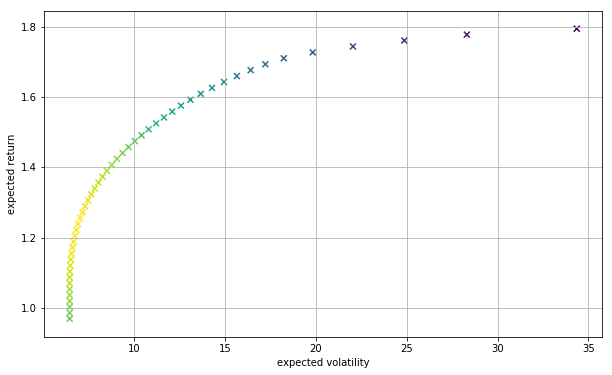

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')